In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dat = pd.read_csv("data/dat_311111_1M_v2.csv")
dat = dat.drop(["Unnamed: 0"], axis = 1)
dat.columns = dat.columns.str.replace(' ', '_')
dat.columns = dat.columns.str.replace('/', '_')
dat.columns

Index(['Sector', 'Description', 'name_sub', 'Sector_sub',
       'Total_Economic_mill_dollar', 'Total_value_Added_mill_dollar',
       'Employee_Com_mill_dollar', 'Net_Tax_mill_dollar',
       'Profits_mill_dollar', 'Direct_Economic_mill_dollar', 'Direct_Economic',
       'CO_t', 'NH3_t', 'NOx_t', 'PM10_t', 'PM2.5_t', 'SO2_t', 'VOC_t',
       'Total_Energy_TJ', 'Coal_TJ', 'NatGase_TJ', 'Petrol_TJ', 'Bio_Waste_TJ',
       'NonFossElec_TJ', 'Total_t_CO2e', 'CO2_Fossil_t_CO2e',
       'CO2_Process_t_CO2e', 'CH4_t_CO2e', 'N2O_t_CO2e', 'HFC_PFCs_t_CO2e',
       'Fugitive_kg', 'Stack_kg', 'Total_Air_kg', 'Surface_water_kg',
       'U_ground_Water_kg', 'Land_kg', 'Offiste_kg', 'POTW_Metal_kg',
       'POTW_Nonmetal_kg', 'Water_Withdrawals_Kgal'],
      dtype='object')

In [3]:
dat.shape

(402, 40)

In [4]:
dat['Sector'] = dat['Sector'].astype('category')
dat['Description'] = dat['Description'].astype('category')
dat['name_sub'] = dat['name_sub'].astype('category')
dat['Sector_sub'] = dat['Sector_sub'].astype('category')

dat.head(50)

,Sector,Description,name_sub,Sector_sub,Total_Economic_mill_dollar,Total_value_Added_mill_dollar,Employee_Com_mill_dollar,Net_Tax_mill_dollar,Profits_mill_dollar,Direct_Economic_mill_dollar,...,Fugitive_kg,Stack_kg,Total_Air_kg,Surface_water_kg,U_ground_Water_kg,Land_kg,Offiste_kg,POTW_Metal_kg,POTW_Nonmetal_kg,Water_Withdrawals_Kgal
0,0,Government and special,Government and special,0.0,0.008643,0.003931,0.003352,-0.000529,0.001109,0.001440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000185,0.000035,0.000000,0.000000,22.280316
1,4,Retail trade,Retail trade,400000.0,0.002689,0.001830,0.001018,0.000388,0.000425,0.000273,...,0.000584,0.000983,0.001566,0.000007,0.000000,0.000042,0.000119,0.000001,0.000003,0.402128
2,48,Transportation and Warehousing,Transportation and Warehousing,480000.0,0.006654,0.003633,0.002244,0.000074,0.001315,0.001548,...,0.000100,0.000022,0.000122,0.000000,0.000000,0.000012,0.000028,0.000000,0.000000,3.169950
3,52,Finance and Insurance,Finance and Insurance,520000.0,0.030743,0.021298,0.008596,0.000483,0.012219,0.001381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.837968
4,11,"Agriculture, Forestry, Fishing and Hunting",Animal Production,112000.0,0.012999,0.006590,0.001193,0.000351,0.005046,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.130343
5,11,"Agriculture, Forestry, Fishing and Hunting",Forestry and Logging,113000.0,0.000822,0.000319,0.000036,0.000063,0.000221,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154068
6,52,Finance and Insurance,Credit Intermediation and Related Activities,522000.0,0.012348,0.007700,0.003380,0.000313,0.004007,0.001764,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.179911
7,53,Real Estate and Rental and Leasing,Rental and Leasing Services,532000.0,0.000846,0.000517,0.000331,0.000041,0.000145,0.000191,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146271
8,61,Educational Services,Educational Services,611000.0,0.001053,0.000576,0.000510,0.000025,0.000041,0.000000,...,0.000001,0.000000,0.000001,0.000000,0.000000,0.000217,0.000006,0.000000,0.000000,5.231197
9,62,Health Care and Social Assistance,Ambulatory Health Care Services,621000.0,0.000009,0.000005,0.000004,0.000000,0.000001,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001004


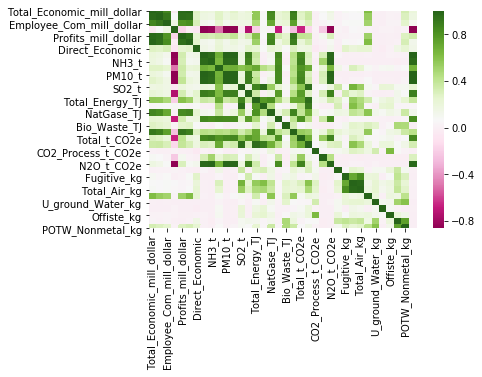

In [5]:
sns.heatmap(dat.corr(), cmap ='PiYG')

In [6]:
dat1 = dat.iloc[:, 11:40]
dat1['Description'] = dat['Description']
dat1.head
corr = dat1.corr(method = 'pearson')
corr[abs(corr)>0.5]

,CO_t,NH3_t,NOx_t,PM10_t,PM2.5_t,SO2_t,VOC_t,Total_Energy_TJ,Coal_TJ,NatGase_TJ,...,Fugitive_kg,Stack_kg,Total_Air_kg,Surface_water_kg,U_ground_Water_kg,Land_kg,Offiste_kg,POTW_Metal_kg,POTW_Nonmetal_kg,Water_Withdrawals_Kgal
CO_t,1.000000,0.967784,0.682512,0.995107,0.992557,NaN,0.892371,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993787
NH3_t,0.967784,1.000000,0.636676,0.971469,0.966080,NaN,0.865423,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965699
NOx_t,0.682512,0.636676,1.000000,0.665969,0.685423,0.587212,0.630970,0.716074,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671867
PM10_t,0.995107,0.971469,0.665969,1.000000,0.997091,NaN,0.888153,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997207
PM2.5_t,0.992557,0.966080,0.685423,0.997091,1.000000,NaN,0.886953,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996474
SO2_t,NaN,NaN,0.587212,NaN,NaN,1.000000,NaN,0.871467,0.964819,0.541694,...,NaN,0.659124,0.539831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VOC_t,0.892371,0.865423,0.630970,0.888153,0.886953,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885343
Total_Energy_TJ,NaN,NaN,0.716074,NaN,NaN,0.871467,NaN,1.000000,0.781698,0.816504,...,NaN,0.556160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coal_TJ,NaN,NaN,NaN,NaN,NaN,0.964819,NaN,0.781698,1.000000,NaN,...,NaN,0.610300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NatGase_TJ,NaN,NaN,NaN,NaN,NaN,0.541694,NaN,0.816504,NaN,1.000000,...,NaN,NaN,NaN,0.584713,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sns.pairplot(dat1, hue = 'Description')

# Cluster

In [8]:
from sklearn.cluster import KMeans

In [38]:
dat_cap = dat.loc[:, ['CO_t', 'NH3_t', 'NOx_t', 'PM10_t', 'PM2.5_t', 'SO2_t', 'VOC_t','Coal_TJ', 'NatGase_TJ', 'Petrol_TJ', 'Bio_Waste_TJ',
       'NonFossElec_TJ']]
dat_ghg = dat.loc[:,['CO2_Fossil_t_CO2e','CO2_Process_t_CO2e', 'CH4_t_CO2e', 'N2O_t_CO2e', 'HFC_PFCs_t_CO2e','Coal_TJ', 'NatGase_TJ', 'Petrol_TJ', 'Bio_Waste_TJ',
       'NonFossElec_TJ','Water_Withdrawals_Kgal']]
dat_toxic = dat.loc[:,['Fugitive_kg', 'Stack_kg', 'Total_Air_kg', 'Surface_water_kg','U_ground_Water_kg', 'Land_kg', 'Offiste_kg', 'POTW_Metal_kg','POTW_Nonmetal_kg','Coal_TJ', 'NatGase_TJ', 'Petrol_TJ', 'Bio_Waste_TJ',
       'NonFossElec_TJ','Water_Withdrawals_Kgal']]
dat_ghg1 = dat.loc[:,['Total_t_CO2e','Coal_TJ', 'NatGase_TJ', 'Petrol_TJ', 'Bio_Waste_TJ',
       'NonFossElec_TJ','Water_Withdrawals_Kgal']]
#input1 = dat.loc[:,['Coal_TJ', 'NatGase_TJ', 'Petrol_TJ', 'Bio_Waste_TJ',
       #'NonFossElec_TJ','Water_Withdrawals_Kgal']]

In [35]:
dat_cap = dat_cap.set_index(dat['Sector_sub'])
dat_cap1 =dat_cap.loc[~dat_cap.apply(lambda row: (row==0).all(), axis=1)]

### Determin the optimal K in K-means

In [11]:
cost = []
for i in range(1,20): #20 is the number of the sector group
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(dat_cap)
    cost.append(KM.inertia_)

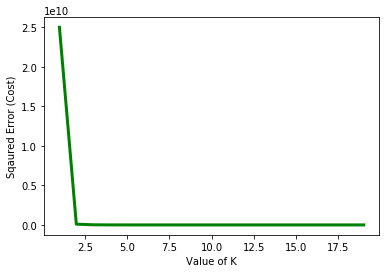

In [12]:
plt.plot(range(1, 20), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot

In [13]:
KM1 = KMeans(n_clusters = 4)
cap = KM1.fit(dat_cap)

In [14]:
cap.labels_ # Find a obvious outlier in this dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
dat1['cap'] = cap.labels_

In [16]:
dat1

,CO_t,NH3_t,NOx_t,PM10_t,PM2.5_t,SO2_t,VOC_t,Total_Energy_TJ,Coal_TJ,NatGase_TJ,...,Total_Air_kg,Surface_water_kg,U_ground_Water_kg,Land_kg,Offiste_kg,POTW_Metal_kg,POTW_Nonmetal_kg,Water_Withdrawals_Kgal,Description,cap
0,0.025227,0.000052,0.016156,0.004476,0.000846,0.000777,0.002311,0.053763,0.000091,0.018687,...,0.000000,0.000000,0.0,0.000185,0.000035,0.000000,0.000000,22.280316,Government and special,0
1,0.001460,0.000002,0.000568,0.000156,0.000031,0.000029,0.002673,0.002547,0.000017,0.000387,...,0.001566,0.000007,0.0,0.000042,0.000119,0.000001,0.000003,0.402128,Retail trade,0
2,0.019526,0.000019,0.062806,0.002200,0.002076,0.004189,0.002321,0.014982,0.000044,0.006447,...,0.000122,0.000000,0.0,0.000012,0.000028,0.000000,0.000000,3.169950,Transportation and Warehousing,0
3,0.000026,0.000001,0.000055,0.000009,0.000004,0.000123,0.000002,0.003171,0.000024,0.000918,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.837968,Finance and Insurance,0
4,0.035738,0.351702,0.029506,0.005548,0.003891,0.006212,0.010948,0.079800,0.000000,0.005250,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,206.130343,"Agriculture, Forestry, Fishing and Hunting",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Other Services (except Public Administration),0
398,0.000004,0.000000,0.000007,0.000001,0.000000,0.000004,0.000531,0.000446,0.000003,0.000141,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000535,0.200133,Other Services (except Public Administration),0
399,0.000004,0.000000,0.000002,0.000000,0.000000,0.000001,0.000000,0.000112,0.000001,0.000040,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.018462,Other Services (except Public Administration),0
400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,Other Services (except Public Administration),0


In [17]:
#dat1.iloc[15,:] # drop this row 

In [19]:
#cap_drop15 = dat_cap.drop([15],axis=0)

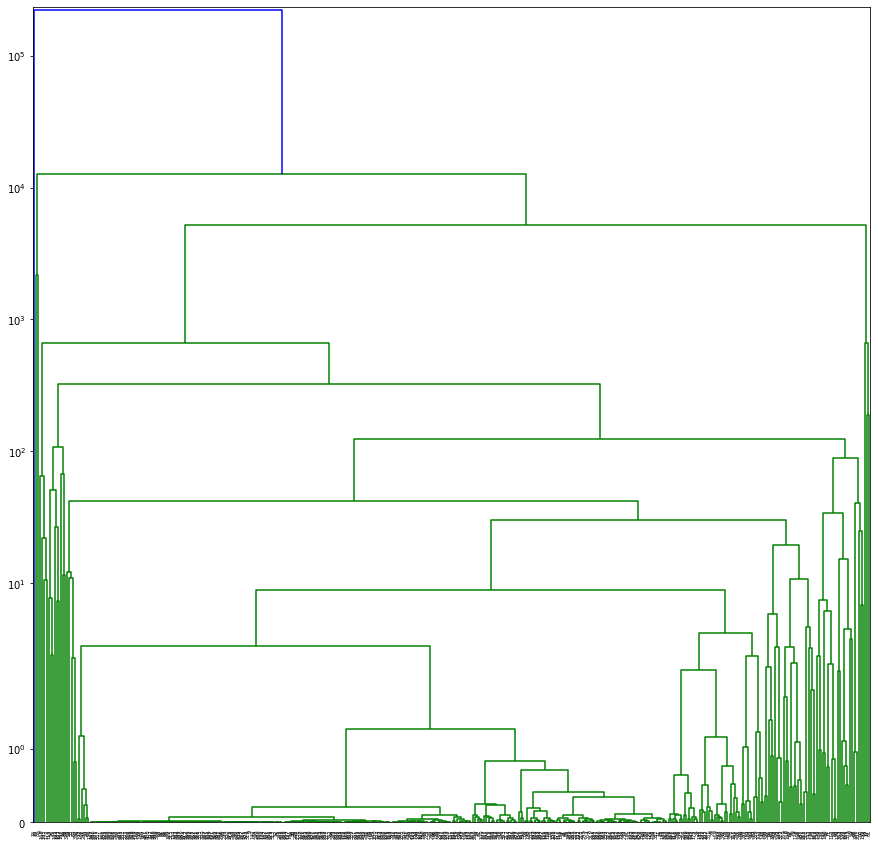

In [39]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
Z = linkage(dat_ghg1, method='ward')
plt.figure(figsize=(15,15))
dendrogram(Z) 
plt.yscale('symlog')
plt.show()

In [131]:
from sklearn.cluster import DBSCAN
import numpy as np
import collections
count = []
for i in np.arange(0.01, 2, 0.01): 
    clustering = DBSCAN(eps= i, leaf_size=10).fit(dat_toxic)
    a = clustering.labels_
    b = collections.Counter(a).get(-1)
    count.append(b)

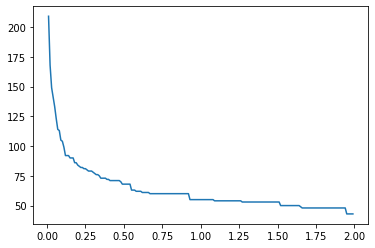

In [132]:
plt.plot(pd.Series(np.arange(0.01, 2, 0.01)),count)

In [85]:
count1 = pd.DataFrame(count)

In [87]:
count1

<bound method DataFrame.sum of     0    1    2    3    4    5    6    7    8    9    ...  372  373  374  375  \
0     0    0    0    0   -1    0    0    0    0    0  ...    0    0    0    0   
1     0    0    0    0   -1    0    0    0    0    0  ...    0    0    0    0   
2     0    0    0    0   -1    0    0    0    0    0  ...    0    0    0    0   
3     0    0    0    0   -1    0    0    0    0    0  ...    0    0    0    0   
4     0    0    0    0   -1    0    0    0    0    0  ...    0    0    0    0   
5     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
6     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
7     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
8     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
9     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
10    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0 